In [12]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
from adjustText import adjust_text

#Loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

In [3]:
df_DA_IN = df[(df['job_title_short'] == 'Data Analyst') & (df['job_location'] == 'India')].copy()
df_DA_IN = df_DA_IN.dropna(subset=['salary_year_avg'])
df_DA_IN_exploded = df_DA_IN.explode('job_skills')
df_DA_IN_exploded[['salary_year_avg', 'job_skills']].head()


,salary_year_avg,job_skills
29583,119250.0,sql
29583,119250.0,visio
29583,119250.0,excel
29583,119250.0,jira
29583,119250.0,confluence


In [15]:
df_DA_skills = df_DA_IN_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_IN)
df_DA_skills['skill_percent'] = (df_DA_skills['skill_count'] / DA_job_count) * 100

df_DA_skills_high_demand = df_DA_skills.head(7).copy()
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,9,79200.00,64.285714
excel,8,82092.75,57.142857
python,6,75400.00,42.857143
r,3,71600.00,21.428571
tableau,3,79200.00,21.428571
word,3,89118.00,21.428571
flow,2,96603.75,14.285714


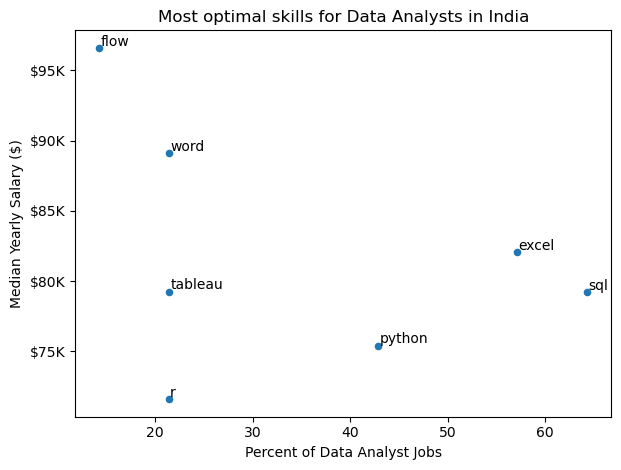

In [16]:
df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
plt.title('Most optimal skills for Data Analysts in India')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($)')
plt.tight_layout()

texts = []

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt, fontsize=10))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.show()